# Binary Diabaties Classification using KNN

In [584]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



### Data Preprocessing

In [585]:
X_train = pd.read_csv('./dataset/Diabetes_XTrain.csv')
Y_train = pd.read_csv('./dataset/Diabetes_YTrain.csv')
X_test = pd.read_csv('./dataset/Diabetes_Xtrain.csv')


In [586]:
print(X_train.head())
print(Y_train.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23  
   Outcome
0        1
1        0
2        1
3        1
4        0


In [587]:
X_train = X_train.replace(0,np.nan)
X_train['Pregnancies'].fillna(X_train['Pregnancies'].mean(), inplace = True)

X_train['Glucose'].fillna(X_train['Glucose'].mean(), inplace = True)
X_train['BloodPressure'].fillna(X_train['BloodPressure'].mean(), inplace = True)
X_train['SkinThickness'].fillna(X_train['SkinThickness'].mean(), inplace = True)
X_train['Insulin'].fillna(X_train['Insulin'].mean(), inplace = True)
X_train['BMI'].fillna(X_train['BMI'].mean(), inplace = True)
print(X_train.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          7.0    168.0           88.0      42.000000  321.000000  38.2   
1          8.0    110.0           76.0      28.962963  147.221477  27.8   
2          7.0    147.0           76.0      28.962963  147.221477  39.4   
3          2.0    100.0           66.0      20.000000   90.000000  32.9   
4          4.0    129.0           86.0      20.000000  270.000000  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23  


In [588]:
#X_test=X_test.drop(columns=['Pregnancies'])
X_test = X_test.replace(0,np.nan)
X_test['Pregnancies'].fillna(X_test['Pregnancies'].mean(), inplace = True)

X_test['Glucose'].fillna(X_test['Glucose'].mean(), inplace = True)
X_test['BloodPressure'].fillna(X_test['BloodPressure'].mean(), inplace = True)
X_test['SkinThickness'].fillna(X_test['SkinThickness'].mean(), inplace = True)
X_test['Insulin'].fillna(X_test['Insulin'].mean(), inplace = True)
X_test['BMI'].fillna(X_test['BMI'].mean(), inplace = True)
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            7.0    168.0           88.0      42.000000  321.000000  38.2   
1            8.0    110.0           76.0      28.962963  147.221477  27.8   
2            7.0    147.0           76.0      28.962963  147.221477  39.4   
3            2.0    100.0           66.0      20.000000   90.000000  32.9   
4            4.0    129.0           86.0      20.000000  270.000000  35.1   
..           ...      ...            ...            ...         ...   ...   
571          2.0    111.0           60.0      28.962963  147.221477  26.2   
572          7.0    187.0           68.0      39.000000  304.000000  37.7   
573          2.0    122.0           60.0      18.000000  106.000000  29.8   
574          4.0    154.0           72.0      29.000000  126.000000  31.3   
575          1.0     88.0           78.0      29.000000   76.000000  32.0   

     DiabetesPedigreeFunction  Age  
0                       0.787   40  
1

[0 1] [375 201]


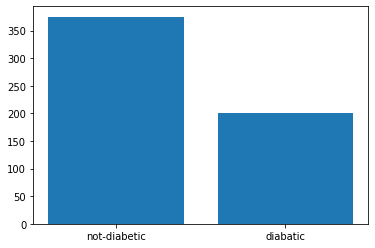

In [589]:

a,b = np.unique(Y_train,return_counts=True)
print(a,b)
plt.bar(a,height=b,tick_label=['not-diabetic','diabatic'])
plt.show()

In [590]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [591]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values



AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [592]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### KNN algorithm

In [593]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals = []
    n = X.shape[0]

    for i in range(n):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))

    vals.sort()
    #print(vals)
    labels=[]
    for i in range(k):
        d,label = vals[i]
        for j in range(k-i) :
            #print(j)
            labels.append(label)
    
    
    labels = np.array(labels)
    #print(labels.s)
    unique, counts = np.unique(labels, return_counts=True)
    
    #print(unique)
    #print(counts)

    ind  = np.argmax(counts)  # Returns Index of Maximum value in the Array

    return unique[ind]


In [594]:
#classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
# fitting model

#classifier.fit(X_train,Y_train)

# making predictions

#res = classifier.predict(X_test)


In [595]:
n = X_test.shape[0]

res = []
for i in range(n):
    temp = knn(X_train,Y_train,X_test[i],11)
    res.append(temp)

print(res)

[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Formatting result in desited Format

In [596]:
df = pd.DataFrame(res,columns=['Outcome'])

In [597]:
df

,Outcome
0,1
1,0
2,1
3,0
4,0
...,...
571,0
572,1
573,0
574,0


In [598]:
df.to_csv('diabates.csv',index=False)